In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


Yelp had realeased a collection of datasets for academic research purposes which contains data about businesses and reviews on yelp. I will be using the json file containing both reviews and businesses data for my project.

In [2]:
# importing necessary modules
import numpy as np #for linear algebra
import pandas as pd #for data processing  
import json #for the json file


##BUSINESS DATA

data_file = open("/content/drive/MyDrive/project/yelp_academic_dataset_business.json")  ##opening the json file
data = []
for line in data_file:
  data.append(json.loads(line)) #parsing each line in the json file into a python dictionary and then appending it into the empty data list created 
df_b = pd.DataFrame(data) #converting the created data list to pandas data frame
data_file.close() #closing the file

In [3]:
#REVIEWS DATA
##The reviews data contains a total of 7000000 rows which is too big hence i decide to just use 70000 rows from the file

data_file2 = "/content/drive/MyDrive/project/yelp_academic_dataset_review.json" #the reviews data file.
json_reader = pd.read_json(data_file2, lines=True, chunksize= 100) #using pandas to read in large data files in chunks and each chunk will have 100 rows
row_count = 0 #initializing the row count to 0
chunks = [] #empty list called chunks
for chunk in json_reader: 
    if row_count + len(chunk) > 70000: #iterates over the json_reader file and checks if the number of rows is within the limit of 70000
        num_rows = 70000 - row_count #setting the limit of the number of rows as 70000. If row_count exceeds 70000 then it will not be added to the chunk 
        chunk = chunk[:num_rows] 
    chunks.append(chunk) #append all the chunks together
    row_count += len(chunk) #updating the row_count by adding the chunk length for each chunk untill it reaches the limit of 70000
    if row_count >= 70000:
        break

df_r = pd.concat(chunks) #combine the list of chunks data into a single data frame



In [4]:
df_b.head() #looking at the first few rows of our business dataframe


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
new_cols = ['review_id', 'user_id', 'business_id', 'stars', 'useful','funny', 'cool', 'text', 'date'] #naming the columns 
df_review = pd.DataFrame(df_r.values, columns=new_cols) #creating the reviews data frame with the values of the original data frame and the above column names
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [6]:
#removing columns that will not be used
del df_review['review_id'] 
del df_review['user_id']
del df_b['hours']
#dropping all na values
df_b1 = df_b.dropna() #dropping all na values
#checking to see if any na values remain and the shape of both the data frames
print(df_review.isnull().sum())
print(df_review.shape)
print(df_b1.isnull().sum())
print(df_b1.shape)

business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64
(70000, 7)
business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
dtype: int64
(136601, 13)


In [7]:
#checking for only restaurants in the categories column
df_b1['restaurant'] = df_b1['categories'].apply(lambda c : 'Restaurants' in c)
#creating a new dataframe with all restaurants present in the business dataframe
df_restaurants = df_b1[df_b1['restaurant'] == True]

df_restaurants.head()

<ipython-input-7-b540cdee3520>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b1['restaurant'] = df_b1['categories'].apply(lambda c : 'Restaurants' in c)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,restaurant
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",True
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...",True
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",True
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",True
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks",True


In [8]:
#creating data frames for restaurants from a few different states out of all the states present in the data frame

rest_ca = df_restaurants[(df_restaurants['state'] == 'CA')] #restaurants from california
rest_pa = df_restaurants[(df_restaurants['state'] == 'PA')] #restaurants from pennsylvania
rest_fl = df_restaurants[(df_restaurants['state'] == 'FL')] #restaurants from florida
rest_nj = df_restaurants[(df_restaurants['state'] == 'NJ')] #restaurants from new jersey
rest_nv = df_restaurants[(df_restaurants['state'] == 'NV')] #restaurants from nevada
rest_az = df_restaurants[(df_restaurants['state'] == 'AZ')] #restaurants from arizona

In [9]:
#creating new dataframes from the state restaurants data frame filtering and selecting the ones with the review count greater than 100 and only some specific columns
ca = rest_ca[rest_ca['review_count'] > 100][['name', 'stars', 'categories','latitude','longitude','city', 'attributes','state']]
pa = rest_pa[rest_pa['review_count'] > 100][['name', 'stars', 'categories','latitude','longitude','city', 'attributes','state']]
fl = rest_fl[rest_fl['review_count'] > 100][['name', 'stars', 'categories','latitude','longitude','city', 'attributes','state']]
nj = rest_nj[rest_nj['review_count'] > 100][['name', 'stars', 'categories','latitude','longitude','city', 'attributes','state']]
nv = rest_nv[rest_nv['review_count'] > 100][['name', 'stars', 'categories','latitude','longitude','city', 'attributes','state']]
az = rest_az[rest_az['review_count'] > 100][['name', 'stars', 'categories','latitude','longitude','city', 'attributes','state']]

In [10]:
#combining all the above datframes into one for mapping them and to understand how these are spread across the country
combined_df = pd.concat([ca, pa, fl, nj, nv, az])


In [11]:
!pip install basemap #installing the basemap package in matplotlib for plotting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


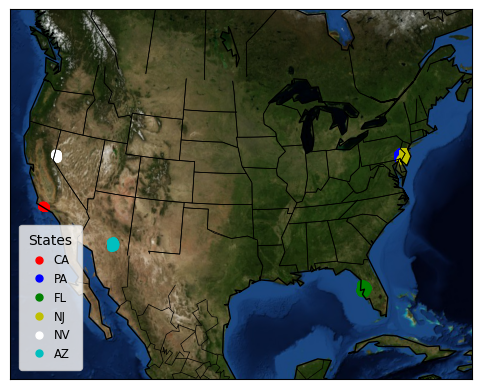

In [12]:
#importing necessary modules
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/') #adding path necessary to import mpl module

from mpl_toolkits.basemap import Basemap

#assigning colors for each state to be plotted and for the legend
colors = {'CA': 'r', 'PA': 'b', 'FL': 'g', 'NJ': 'y', 'NV': 'w', 'AZ': 'c'}
handles = []
for label, color in colors.items():
    marker = mlines.Line2D([], [], color=color, marker='o', linestyle='None',
                           markersize=5, label=label)
    handles.append(marker)

#projects a base satellite map
m = Basemap(projection="aea", width=5000000, height=4000000,
             lat_1=29.5, lat_2=45.5, lon_0=-96, lat_0=38)

m.bluemarble()

#co-ordinates of all the restaurants in the data frame combined
lon = combined_df['longitude']
lat = combined_df['latitude']


for i, row in combined_df.iterrows():
    x, y = m(row['longitude'], row['latitude'])
    color = colors.get(row['state'], 'k')
    m.plot(x, y, 'o', color=color, markersize=5)
   
#plotiing coastlines and borders   
m.drawstates()
m.drawcoastlines()

plt.legend(handles=handles, loc='lower left', title='States', fontsize='small',
           handlelength=1.5, handletextpad=0.5, borderpad=0.8, 
           borderaxespad=0.8, frameon=True)

plt.show()




In [13]:
#defining a function called category which takes in a df and returns another df of all the categories present , their total count, the average rating, and the percentage which is calculated by splitting the categories separated by , and calculating their frequency and percentage. 

def category(df):
  df['categories'] = df['categories'].str.split(', ')
  all_categories = []
  for categories in df['categories']:
    all_categories.extend(categories)
  category_data = {}
  for category in all_categories:
    category_data[category] = {
      'frequency': 0,
      'rating_sum': 0.0
    }
  for _, row in df.iterrows():
    for category in row['categories']:
      category_data[category]['frequency'] += 1
      category_data[category]['rating_sum'] += row['stars']
  category_df = pd.DataFrame.from_dict(category_data, orient='index')
  category_df.index.name = 'category'
  category_df['average_rating'] = category_df['rating_sum'] / category_df['frequency']
  category_df['percentage'] = category_df['frequency'] / len(ca) * 100
  category_df = category_df.sort_values(by='frequency', ascending=False)
  category_df = category_df.drop(index=category_df[category_df.index == 'Restaurants'].index[0])
  return category_df


In [14]:
#categories present in the california restaurants with reviews > 100
cali = category(ca)
cali.head(10)

,frequency,rating_sum,average_rating,percentage
category,,,,
Food,180,716.5,3.980556,35.156250
Nightlife,141,557.0,3.950355,27.539062
Bars,127,502.5,3.956693,24.804688
American (New),110,441.5,4.013636,21.484375
Breakfast & Brunch,109,425.5,3.903670,21.289062
American (Traditional),84,324.5,3.863095,16.406250
Mexican,81,314.5,3.882716,15.820312
Sandwiches,73,293.5,4.020548,14.257812
Seafood,70,270.5,3.864286,13.671875


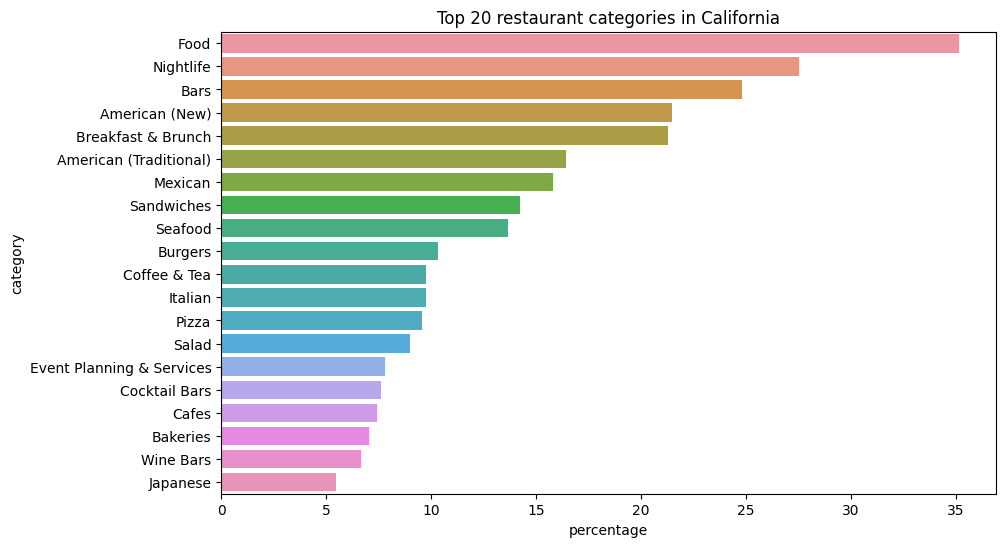

In [15]:
#plotting the top 20 restaurant categories in california
import seaborn as sns

y = cali.head(20)


f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'percentage', y = y.index, data = y)
plt.title('Top 20 restaurant categories in California');

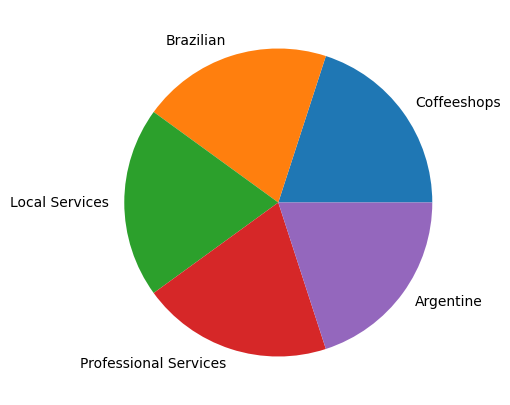

In [16]:
#plotting the lowest 5 categories in California
low = cali.tail(5)

fig = plt.figure(figsize = (12, 5))
 
# creating the pie plot
plt.pie(low['percentage'], labels = low.index)
plt.show()


In [17]:
#defining a function called att which takes in a df and returns another df of all the attributes present , their total count and the average rating.
def att(df):
  all_attributes = []
  for i, row in df.iterrows():
    for attribute in row['attributes']:
        if attribute not in all_attributes:
            all_attributes.append(attribute)
  attribute_dict = {}
  for attribute in all_attributes:
      attribute_dict[attribute] = {'freq': 0, 'rating': 0}
  for i, row in df.iterrows():
    for attribute in row['attributes']:
      attribute_dict[attribute]['freq'] += 1
      attribute_dict[attribute]['rating'] += row['stars']
  attr = pd.DataFrame.from_dict(attribute_dict, orient='index')
  attr['avg_rating'] = attr['rating'] / attr['freq']
  attr.index.name = 'attribute'
  attr.reset_index(inplace=True)
  attr.sort_values('freq', ascending=False, inplace=True)
  attr = attr.drop(attr.columns[[2]], axis=1)

  return attr


In [18]:
#attributes present in the california restaurants with reviews > 100
cali_attr = att(ca)
cali_attr.head(10)

,attribute,freq,avg_rating
19,BusinessParking,510,3.894118
5,BusinessAcceptsCreditCards,509,3.891945
0,RestaurantsTakeOut,508,3.897638
8,RestaurantsPriceRange2,504,3.887897
10,OutdoorSeating,504,3.890873
11,RestaurantsDelivery,503,3.895626
21,WiFi,499,3.885772
3,Ambience,492,3.889228
12,HasTV,492,3.887195
14,Alcohol,492,3.883130


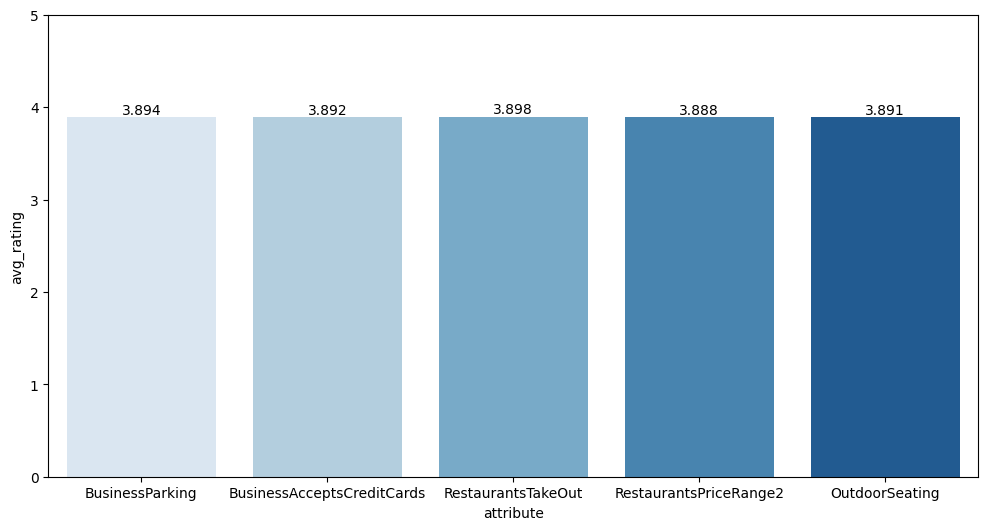

In [19]:
#Top five frequently appearing attributes present in the restaurants and the average rating of these restaurants
r = cali_attr.head(5)

fig = plt.figure(figsize=(12, 6))

ax = sns.barplot(x = 'attribute', y = 'avg_rating', data = r, palette = 'Blues')
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.3f}'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.ylim([0, 5]);

In [20]:
#sorting them ratings
cali_attr2 = cali_attr.sort_values('avg_rating', ascending=False)

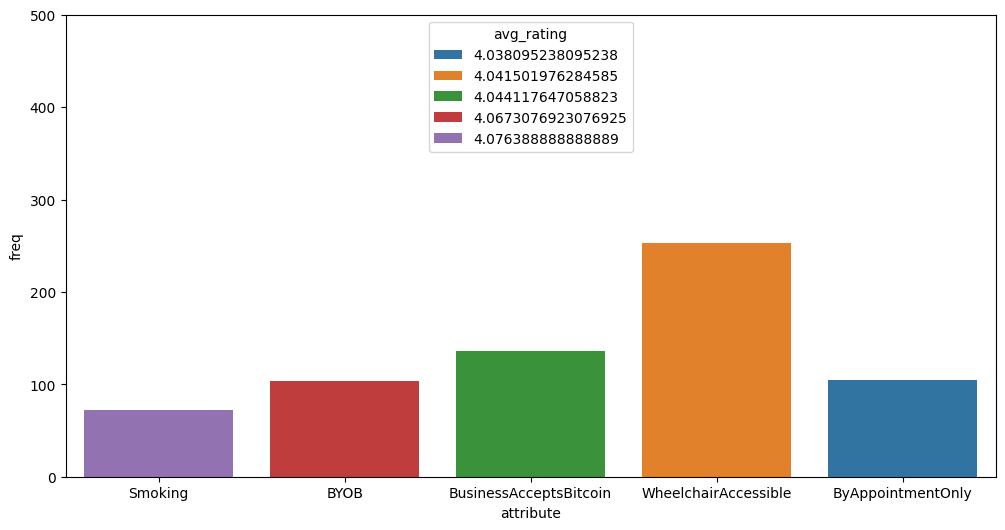

In [21]:
#Attributes present in the top five highest rated present
r = cali_attr2.head(5)

fig = plt.figure(figsize=(12, 6))

ax = sns.barplot(x='attribute', y='freq', data=r, hue='avg_rating', dodge=False)

plt.ylim([0, 500]);


In [22]:
#categories and attributes present in pennsylvania and florida states
penn = category(pa)
penn_attr = att(pa)
flo = category(fl)
flo_attr = att(fl)

In [23]:
#adding a state column in the above dataframes created with their repective states
cali['state'] = 'California'
cali_attr['state'] = 'California'
penn['state'] = 'Pennsylvania'
penn_attr['state'] = 'Pennsylvania'
flo['state'] = 'Florida'
flo_attr['state'] = 'Florida'


In [24]:
#picking top 10 categories for each state
calitop = cali.head(10)
penntop = penn.head(10)
flotop = flo.head(10)

#picking top 5 attributes for each state
calitop_a = cali_attr.head(5)
penntop_a = penn_attr.head(5)
flotop_a = flo_attr.head(5)

#appending all of the categories and attributes in separate data frames
d = calitop.append(penntop)
three_states = d.append(flotop)

m = calitop_a.append(penntop_a)
three_states_attr = m.append(flotop_a)

<ipython-input-24-e8bf6a7671fb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d = calitop.append(penntop)
<ipython-input-24-e8bf6a7671fb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  three_states = d.append(flotop)
<ipython-input-24-e8bf6a7671fb>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  m = calitop_a.append(penntop_a)
<ipython-input-24-e8bf6a7671fb>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  three_states_attr = m.append(flotop_a)


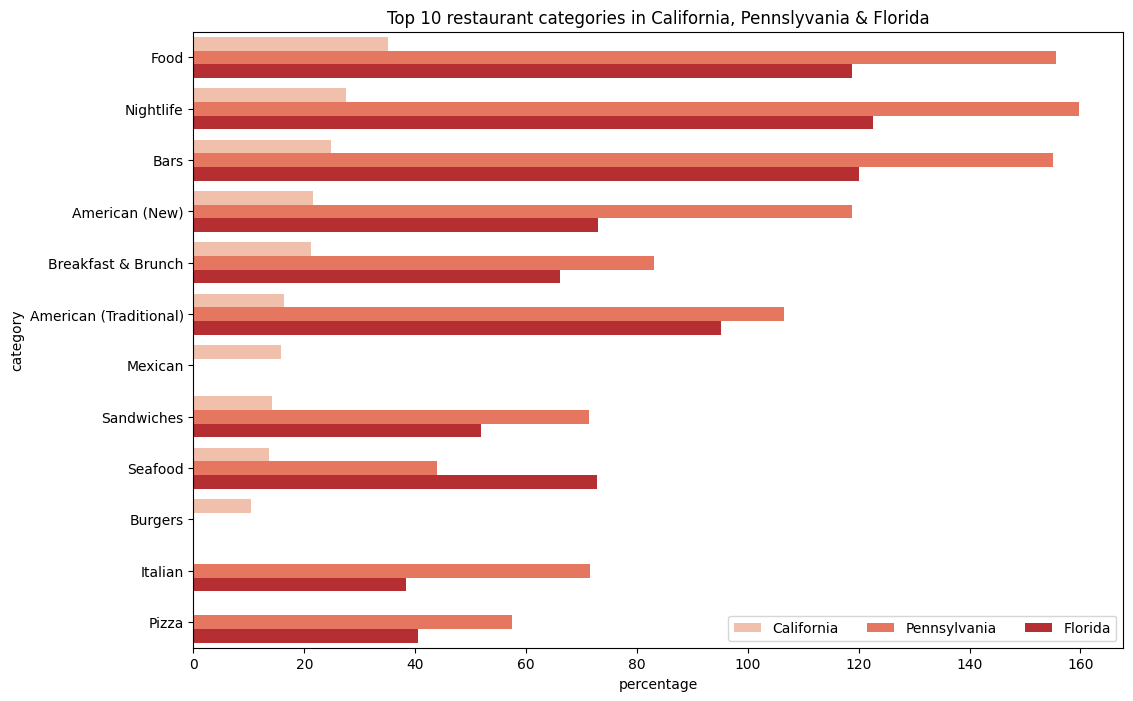

In [25]:
#comparing top 10 restaurant categories by state
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = 'percentage', y = three_states.index, hue = 'state', data = three_states , palette= "Reds")
ax.legend(ncol=3, loc="lower right", frameon=True)
plt.title("Top 10 restaurant categories in California, Pennslyvania & Florida");

In [26]:
three_states_attr2 = three_states_attr.sort_values('avg_rating', ascending=False) #sorting values by average rating

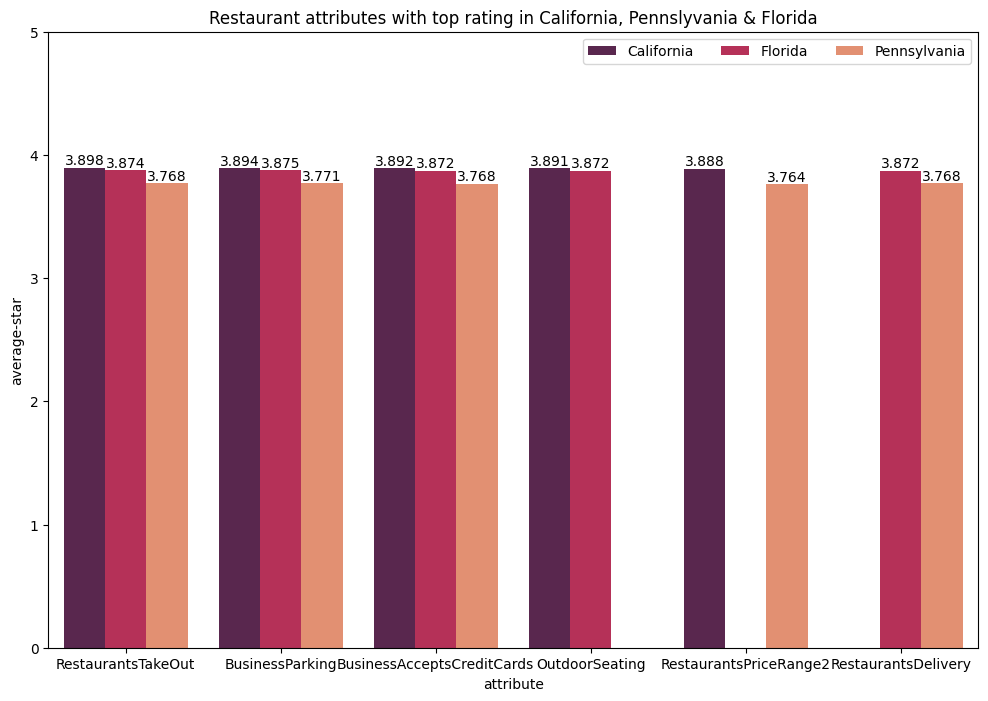

In [27]:
#comparing restaurant attributes of top rated restaurants by state
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y = 'avg_rating', x = 'attribute', hue = 'state',  data = three_states_attr2, palette="rocket")
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.3f}'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.ylabel('average-star')
plt.ylim([0, 5])
ax.legend(ncol=3, loc="upper right", frameon=True)
plt.title('Restaurant attributes with top rating in California, Pennslyvania & Florida');

In [28]:
#merging the reviews and business data frames on business id into one data frame

from datetime import datetime

merged_df = pd.merge(df_restaurants, df_review, on=['business_id'])
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y-%m-%d %H:%M:%S')
merged_df['date'] = merged_df['date'].dt.strftime('%Y-%m-%d')
merged_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,attributes,categories,restaurant,stars_y,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",True,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",True,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",True,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",True,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",True,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25


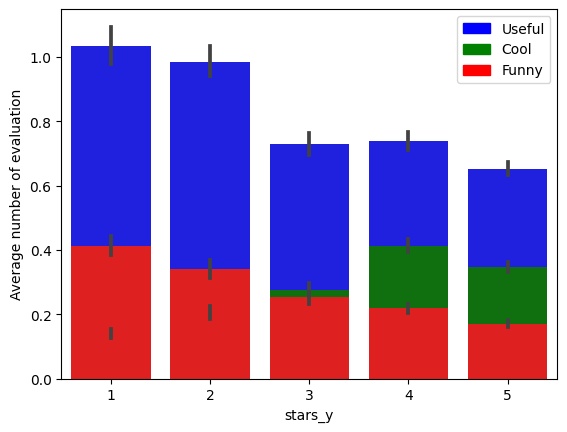

In [29]:
#plotting the useful, cool and funny reviews for all the restaurants and for each rating category
sns.barplot(x='stars_y', y='useful', data=merged_df, color='blue')
sns.barplot(x='stars_y', y='cool', data=merged_df, color='green')
sns.barplot(x='stars_y', y='funny', data=merged_df, color='red')
plt.ylabel('Average number of evaluation')

blue_patch = plt.Rectangle((0,0), 1, 1, color='blue', label='Useful')
green_patch = plt.Rectangle((0,0), 1, 1, color='green', label='Cool')
red_patch = plt.Rectangle((0,0), 1, 1, color='red', label='Funny')
plt.legend(handles=[blue_patch, green_patch, red_patch])

plt.show()

In [49]:
#Filtering all the text which do not contain alphabetical character in the string
import re
merged_df = merged_df[merged_df['text'].str.contains(r'[a-zA-Z]')]
merged_df['text'] = merged_df['text'].str.replace(r'#?/""+', '')

<ipython-input-49-80dbc615b6f4>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  merged_df['text'] = merged_df['text'].str.replace(r'#?/""+', '')


In [50]:
review_list = list(merged_df['text']) #new list containing only the text reviews for all restaurants

In [51]:
!pip install vaderSentiment #installing vaderSentiment analysis tool to analyze and assign a sentiment score for each text review

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
# a rule-based sentiment analysis tool that uses a lexicon of words and phrases with pre-defined sentiment scores to determine the overall sentiment of the text.

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_vader(sentence):

    # Creating a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 : #positive
        overall_sentiment = 1

    elif sentiment_dict['compound'] <= - 0.05 : #negative
        overall_sentiment = -1

    else :
        overall_sentiment = 0 #neutral
  
    return negative, neutral, positive, compound, overall_sentiment

In [54]:
#iterating over the reviews in review list to return a sentiment list for each 
sent_list = []
for reviews in review_list:
  _, _, _, _, sent = sentiment_vader(reviews)
  sent_list.append(sent)

In [55]:
merged_df['Sentiment'] = sent_list # a new column called Sentiment to display the sentiment

In [56]:
merged_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,restaurant,stars_y,useful,funny,cool,text,date,Sentiment,category
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",True,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26,1,False
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",True,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05,1,False
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",True,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25,1,False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",True,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20,1,False
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",True,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25,-1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50521,TCROPjxfzCZzrQjqLqstSg,Red Cup Cafe & Hookah Lounge,400 Fairmount Ave,Philadelphia,PA,19123,39.962577,-75.144748,4.0,53,...,"Coffee & Tea, Hookah Bars, Nightlife, Bars, Fo...",True,5,0,0,0,"I give this place even more stars, if I could....",2010-12-05,1,False
50522,TCROPjxfzCZzrQjqLqstSg,Red Cup Cafe & Hookah Lounge,400 Fairmount Ave,Philadelphia,PA,19123,39.962577,-75.144748,4.0,53,...,"Coffee & Tea, Hookah Bars, Nightlife, Bars, Fo...",True,4,0,0,0,Hours keep getting moved back. Now closing at ...,2014-08-11,1,False
50523,TCROPjxfzCZzrQjqLqstSg,Red Cup Cafe & Hookah Lounge,400 Fairmount Ave,Philadelphia,PA,19123,39.962577,-75.144748,4.0,53,...,"Coffee & Tea, Hookah Bars, Nightlife, Bars, Fo...",True,4,3,0,0,Stopped by this new place today and met the ow...,2010-01-10,1,False
50524,TCROPjxfzCZzrQjqLqstSg,Red Cup Cafe & Hookah Lounge,400 Fairmount Ave,Philadelphia,PA,19123,39.962577,-75.144748,4.0,53,...,"Coffee & Tea, Hookah Bars, Nightlife, Bars, Fo...",True,5,0,0,0,This small cafe in northern liberties is the b...,2014-04-21,1,False


In [57]:
#grouping the merged data frame by stars and sentiments and using a pivot table to return a dataframe which consists of total reviews in each sentiment for every star rating
grouped = merged_df.groupby(['stars_y', 'Sentiment']).size().reset_index(name='count')
pivot_table = pd.pivot_table(grouped, values='count', index='stars_y', columns='Sentiment', aggfunc=sum, fill_value=0)
pivot_table.columns = ['Negative', 'Neutral', 'Positive']
new_df = pd.DataFrame(pivot_table)
new_df

,Negative,Neutral,Positive
stars_y,,,
1,2825,180,2022
2,1340,139,2967
3,677,113,5553
4,237,71,13575
5,193,93,20539


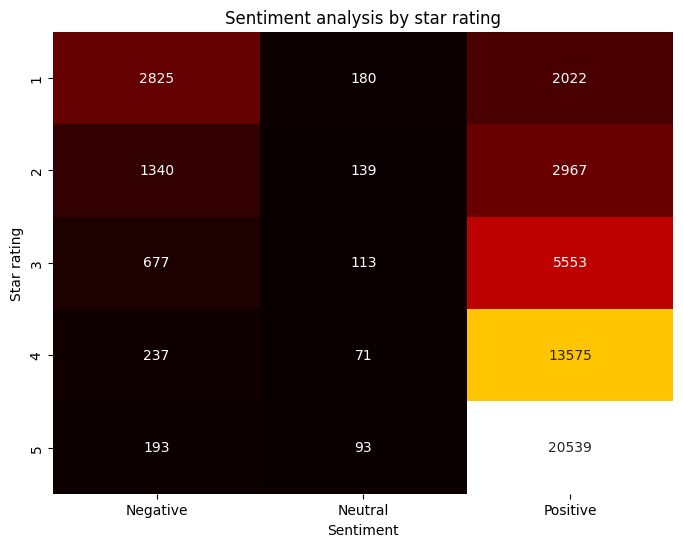

In [58]:
#Plotting a heatmap to visualize the patterns between rating and review sentiment
plt.figure(figsize=(8, 6))
sns.heatmap(new_df, cmap='hot', annot=True, fmt='g', cbar=False)

plt.title('Sentiment analysis by star rating')
plt.xlabel('Sentiment')
plt.ylabel('Star rating')

plt.show()

In [62]:
##checking for only Mexican restaurants in the categories column to filter out the mexican restaurants.
merged_df['category'] = merged_df['categories'].apply(lambda c : 'Mexican' in c)

df_mex = merged_df[merged_df['category'] == True]

In [63]:
#creating data frames for Mexican restaurants from California
mex_ca = df_mex[(df_mex['state'] == 'CA')]
mex_ca

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,restaurant,stars_y,useful,funny,cool,text,date,Sentiment,category
1831,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,CA,93117,34.430542,-119.882367,4.0,189,...,"Burgers, Cafes, Restaurants, Mexican, American...",True,4,0,0,0,The burgers are amazing! French fries are dece...,2012-11-07,1,True
1832,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,CA,93117,34.430542,-119.882367,4.0,189,...,"Burgers, Cafes, Restaurants, Mexican, American...",True,2,0,0,0,"This was our first time trying Cal Taco, as we...",2011-07-28,1,True
1833,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,CA,93117,34.430542,-119.882367,4.0,189,...,"Burgers, Cafes, Restaurants, Mexican, American...",True,4,0,0,0,Best Onion Rings in Santa Barbara/Goleta!!! Ra...,2012-02-29,1,True
1834,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,CA,93117,34.430542,-119.882367,4.0,189,...,"Burgers, Cafes, Restaurants, Mexican, American...",True,3,0,0,0,"they started serving breakfast, and its a good...",2014-04-01,-1,True
1835,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,"7320 Hollister Ave, Ste 1",Goleta,CA,93117,34.430542,-119.882367,4.0,189,...,"Burgers, Cafes, Restaurants, Mexican, American...",True,5,0,0,0,This place has been around for years and it's ...,2012-08-15,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38553,ywXa1pDqHPe9tOPx0yJFUg,Otaco,6530 Pardall Rd,Goleta,CA,93117,34.413272,-119.854780,3.0,57,...,"Nightlife, Bars, Karaoke, Beer Bar, Restaurant...",True,1,4,9,1,Otaco? More like Oshitno! I was so disappointe...,2015-05-27,1,True
38554,ywXa1pDqHPe9tOPx0yJFUg,Otaco,6530 Pardall Rd,Goleta,CA,93117,34.413272,-119.854780,3.0,57,...,"Nightlife, Bars, Karaoke, Beer Bar, Restaurant...",True,5,0,0,0,"Their new menu is on point, everyone that work...",2015-11-20,1,True
38555,ywXa1pDqHPe9tOPx0yJFUg,Otaco,6530 Pardall Rd,Goleta,CA,93117,34.413272,-119.854780,3.0,57,...,"Nightlife, Bars, Karaoke, Beer Bar, Restaurant...",True,1,1,0,0,"Ordered the papas ""bowl""--potatoes are the onl...",2015-06-25,1,True
38556,ywXa1pDqHPe9tOPx0yJFUg,Otaco,6530 Pardall Rd,Goleta,CA,93117,34.413272,-119.854780,3.0,57,...,"Nightlife, Bars, Karaoke, Beer Bar, Restaurant...",True,1,0,0,0,Absolutely disgusting! If you want quality foo...,2015-05-14,-1,True


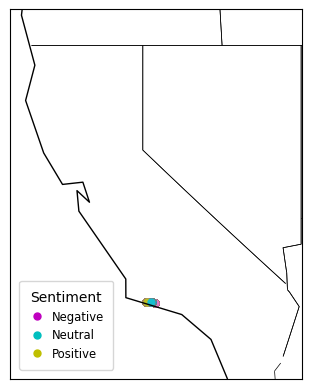

In [64]:
#plotting the restaurant locations on California map

colors = {'Negative': 'm', 'Neutral': 'c', 'Positive': 'y'}
handles = []
for label, color in colors.items():
    marker = mlines.Line2D([], [], color=color, marker='o', linestyle='None',
                           markersize=5, label=label)
    handles.append(marker)


lat = mex_ca['latitude']
lon = mex_ca['longitude']

#defining only california region to be plotted
map = Basemap(llcrnrlon=-125, llcrnrlat=32, urcrnrlon=-114, urcrnrlat=43,
              projection='merc', lat_0 = 37.5, lon_0 = -119)

for i, row in mex_ca.iterrows():
    x, y = map(row['longitude'], row['latitude'])
    color = colors.get(row['Sentiment'])
    map.plot(x, y, 'o', color=color, markersize=5)

#for state borders
map.drawstates()

#for coastlines
map.drawcoastlines()


plt.legend(handles=handles, loc='lower left', title='Sentiment', fontsize='small',
           handlelength=1.5, handletextpad=0.5, borderpad=0.8, 
           borderaxespad=0.8, frameon=True)



plt.show()


In [65]:
#Grouping the mexican restaurants by name and calculating the mean rating and sentiment score
mex_stars = mex_ca.groupby(['name'])['name', 'stars_x', 'review_count','Sentiment'].mean().reset_index().loc[0:, ]
mex_stars = mex_stars = mex_stars.sort_values(by='review_count', ascending=False)
x = mex_stars.head(8)
y = mex_stars.tail(7)

<ipython-input-65-6c11fc0ab624>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mex_stars = mex_ca.groupby(['name'])['name', 'stars_x', 'review_count','Sentiment'].mean().reset_index().loc[0:, ]
<ipython-input-65-6c11fc0ab624>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mex_stars = mex_ca.groupby(['name'])['name', 'stars_x', 'review_count','Sentiment'].mean().reset_index().loc[0:, ]


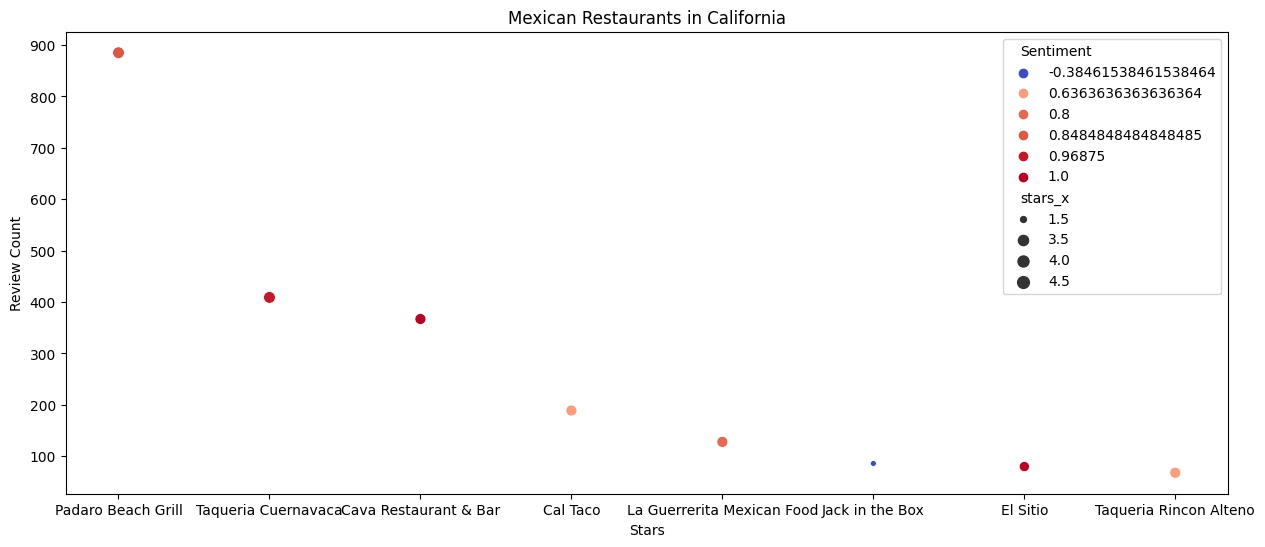

In [66]:
#plotting the top 8 frequently reviewed restaurants in california and their rating and mean sentiment score.
plt.figure(figsize=(15, 6))

sns.scatterplot(data=x, x='name', y='review_count', hue='Sentiment', palette='coolwarm', size='stars_x')

# Add axis labels and a title
plt.xlabel('Stars')
plt.ylabel('Review Count')
plt.title('Mexican Restaurants in California')

# Show the plot
plt.show()

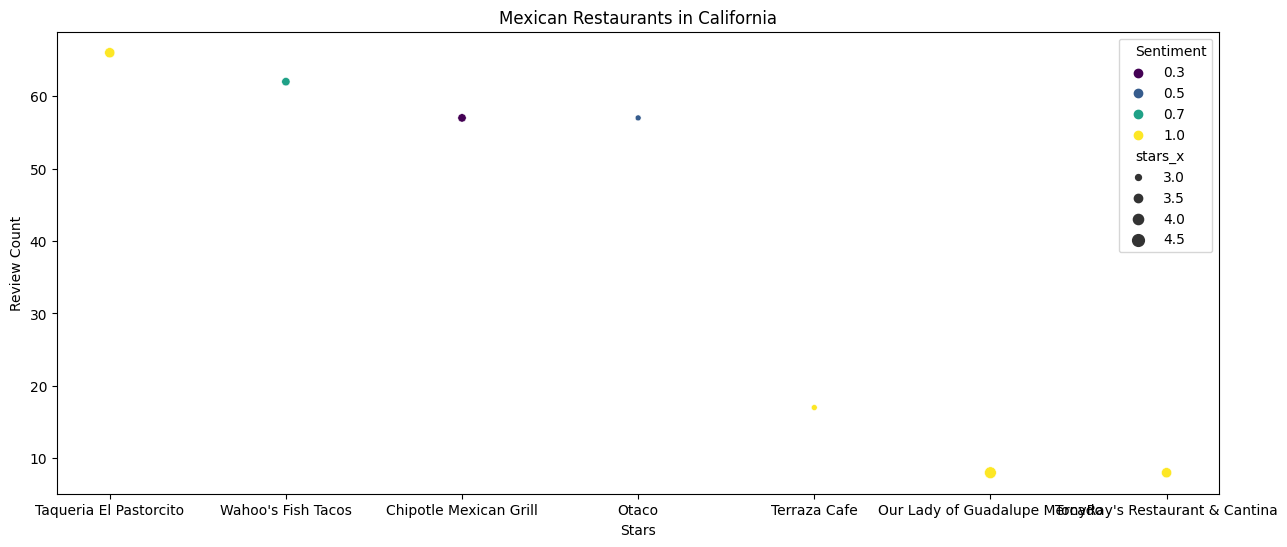

In [67]:
plt.figure(figsize=(15, 6))

sns.scatterplot(data=y, x='name', y='review_count', hue='Sentiment', palette='viridis', size='stars_x')

# Add axis labels and a title
plt.xlabel('Stars')
plt.ylabel('Review Count')
plt.title('Mexican Restaurants in California')

# Show the plot
plt.show()

In [ ]:
#converting the json files to readable csv files
df_b.to_csv('Yelp_business.csv', index=False)
df_r.to_csv('Yelp_review.csv', index=False)